In [ ]:
# Import modules and dataset. For CNN networks, we have to make sure to include convolution, maxpooling and flatten. Our dataset that we use is presplit and provided at: 
# https://drive.google.com/file/d/1FTCTZaNkgmAyoQ2pZYR4LKxcXI4bLp00/view?usp=sharing

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
# Building our network. Convolution will learn pieces of the image by itself. Pooling is a premeditated method of compressing, and is cheap computationally.
# Our network here uses both, but uses convolution first. This allows the network to learn with the convolution layer and then downsample further for processing. 
# Research suggests that convolution networks with larger strides may perform better than pooling, but we have not incorporated taht into this netwok. 

In [2]:
classifier = Sequential()

In [ ]:
# The convolution inputs are : filters(size of output space), Kernel size(size of the convolution window), and strides(how far to move each convolution window).
# Observe that we input a 64x64 layer and get out a 32x32 layer

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3), activation = 'relu'))

In [ ]:
# Our pooling layer will convert a 4 pixel window down to one pixel. 

In [4]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# After the image has been compressed we flatten out the image into a 1 d array, we can then connect this to a normal neural network and see the results. 
# You can envision the convolution and pooling as a preprocessing step to a normal network for images or image like data(sound data can have be used here as well)

In [5]:
classifier.add(Flatten())

In [6]:
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# A common step in image recognition is to increase your data set by making small alterations to your original data set like flips or translations. 
# Note that we rescale the color to make it greyscale.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load our dataset using test_datagen.flow_from_directory function. 

In [10]:
training_set=test_datagen.flow_from_directory(
    'training_set',
    target_size=(64,64),
    batch_size=32, 
    class_mode = 'binary',
    shuffle = True)

test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64,64),
    batch_size = 32,
    class_mode='binary')


Found 5319 images belonging to 2 classes.
Found 2032 images belonging to 2 classes.


In [10]:
#Time to fit our model. Note the addition of the steps per epoch parameter. This determines how many batches we look at per epoch with one step calculating one batch of samples. 

In [11]:
history = classifier.fit_generator(
    training_set,
    steps_per_epoch = 50,
    epochs = 20,
    validation_data=test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
50/50 [==============================] - 11s 218ms/step - loss: 0.5866 - accuracy: 0.7481 - val_loss: 0.8584 - val_accuracy: 0.5015
Epoch 2/20
50/50 [==============================] - 10s 195ms/step - loss: 0.5210 - accuracy: 0.7656 - val_loss: 0.8055 - val_accuracy: 0.5015
Epoch 3/20
50/50 [==============================] - 10s 199ms/step - loss: 0.5298 - accuracy: 0.7450 - val_loss: 0.8158 - val_accuracy: 0.5015
Epoch 4/20
50/50 [==============================] - 9s 189ms/step - loss: 0.5216 - accuracy: 0.7538 - val_loss: 0.8104 - val_accuracy: 0.5034
Epoch 5/20
50/50 [==============================] - 10s 193ms/step - loss: 0.5019 - accuracy: 0.7587 - val_loss: 0.7284 - val_accuracy: 0.5157
Epoch 6/20
50/50 [==============================] - 10s 205ms/step - loss: 0.4847 - accuracy: 0.7631 - val_loss: 0.8380 - val_accuracy: 0.5133
Epoch 7/20
50/50 [==============================] - 10s 201ms/step 

In [ ]:
# To see how our model is learning over time, it is best to plot the loss on the training and the validation steps below. 

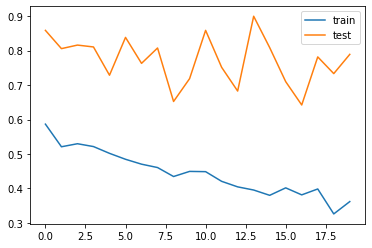

In [12]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Our model learns the trainig set quickly, but has difficulty with the test set. We cna try to increase the layers or parameters in our network to try to improve this.  

In [ ]:
# We can test our model with a random test image below. Note we need a 64x64 resolution image for this test. 

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('RandomDog.png', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
